Constructing hybrid scheme scheme
Setting up fourier grid
Enabling multiprocessing via pool with 2 processes
Set up nD binary tree with N = 256
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Constructing spectral scheme scheme
Setting up fourier grid
Finished in 787 time steps
t = 0 dt = 0.0015894571940104165 min density = 0.8786005329534924 max density = 1.1088908667697426
t = 0.0015894571940104165 dt = 0.0015894571940104165 min density = 0.8786019147769587 max density = 1.108889655392618
t = 0.003178914388020833 dt = 0.0015894571940104165 min density = 0.8786026831959913 max density = 1

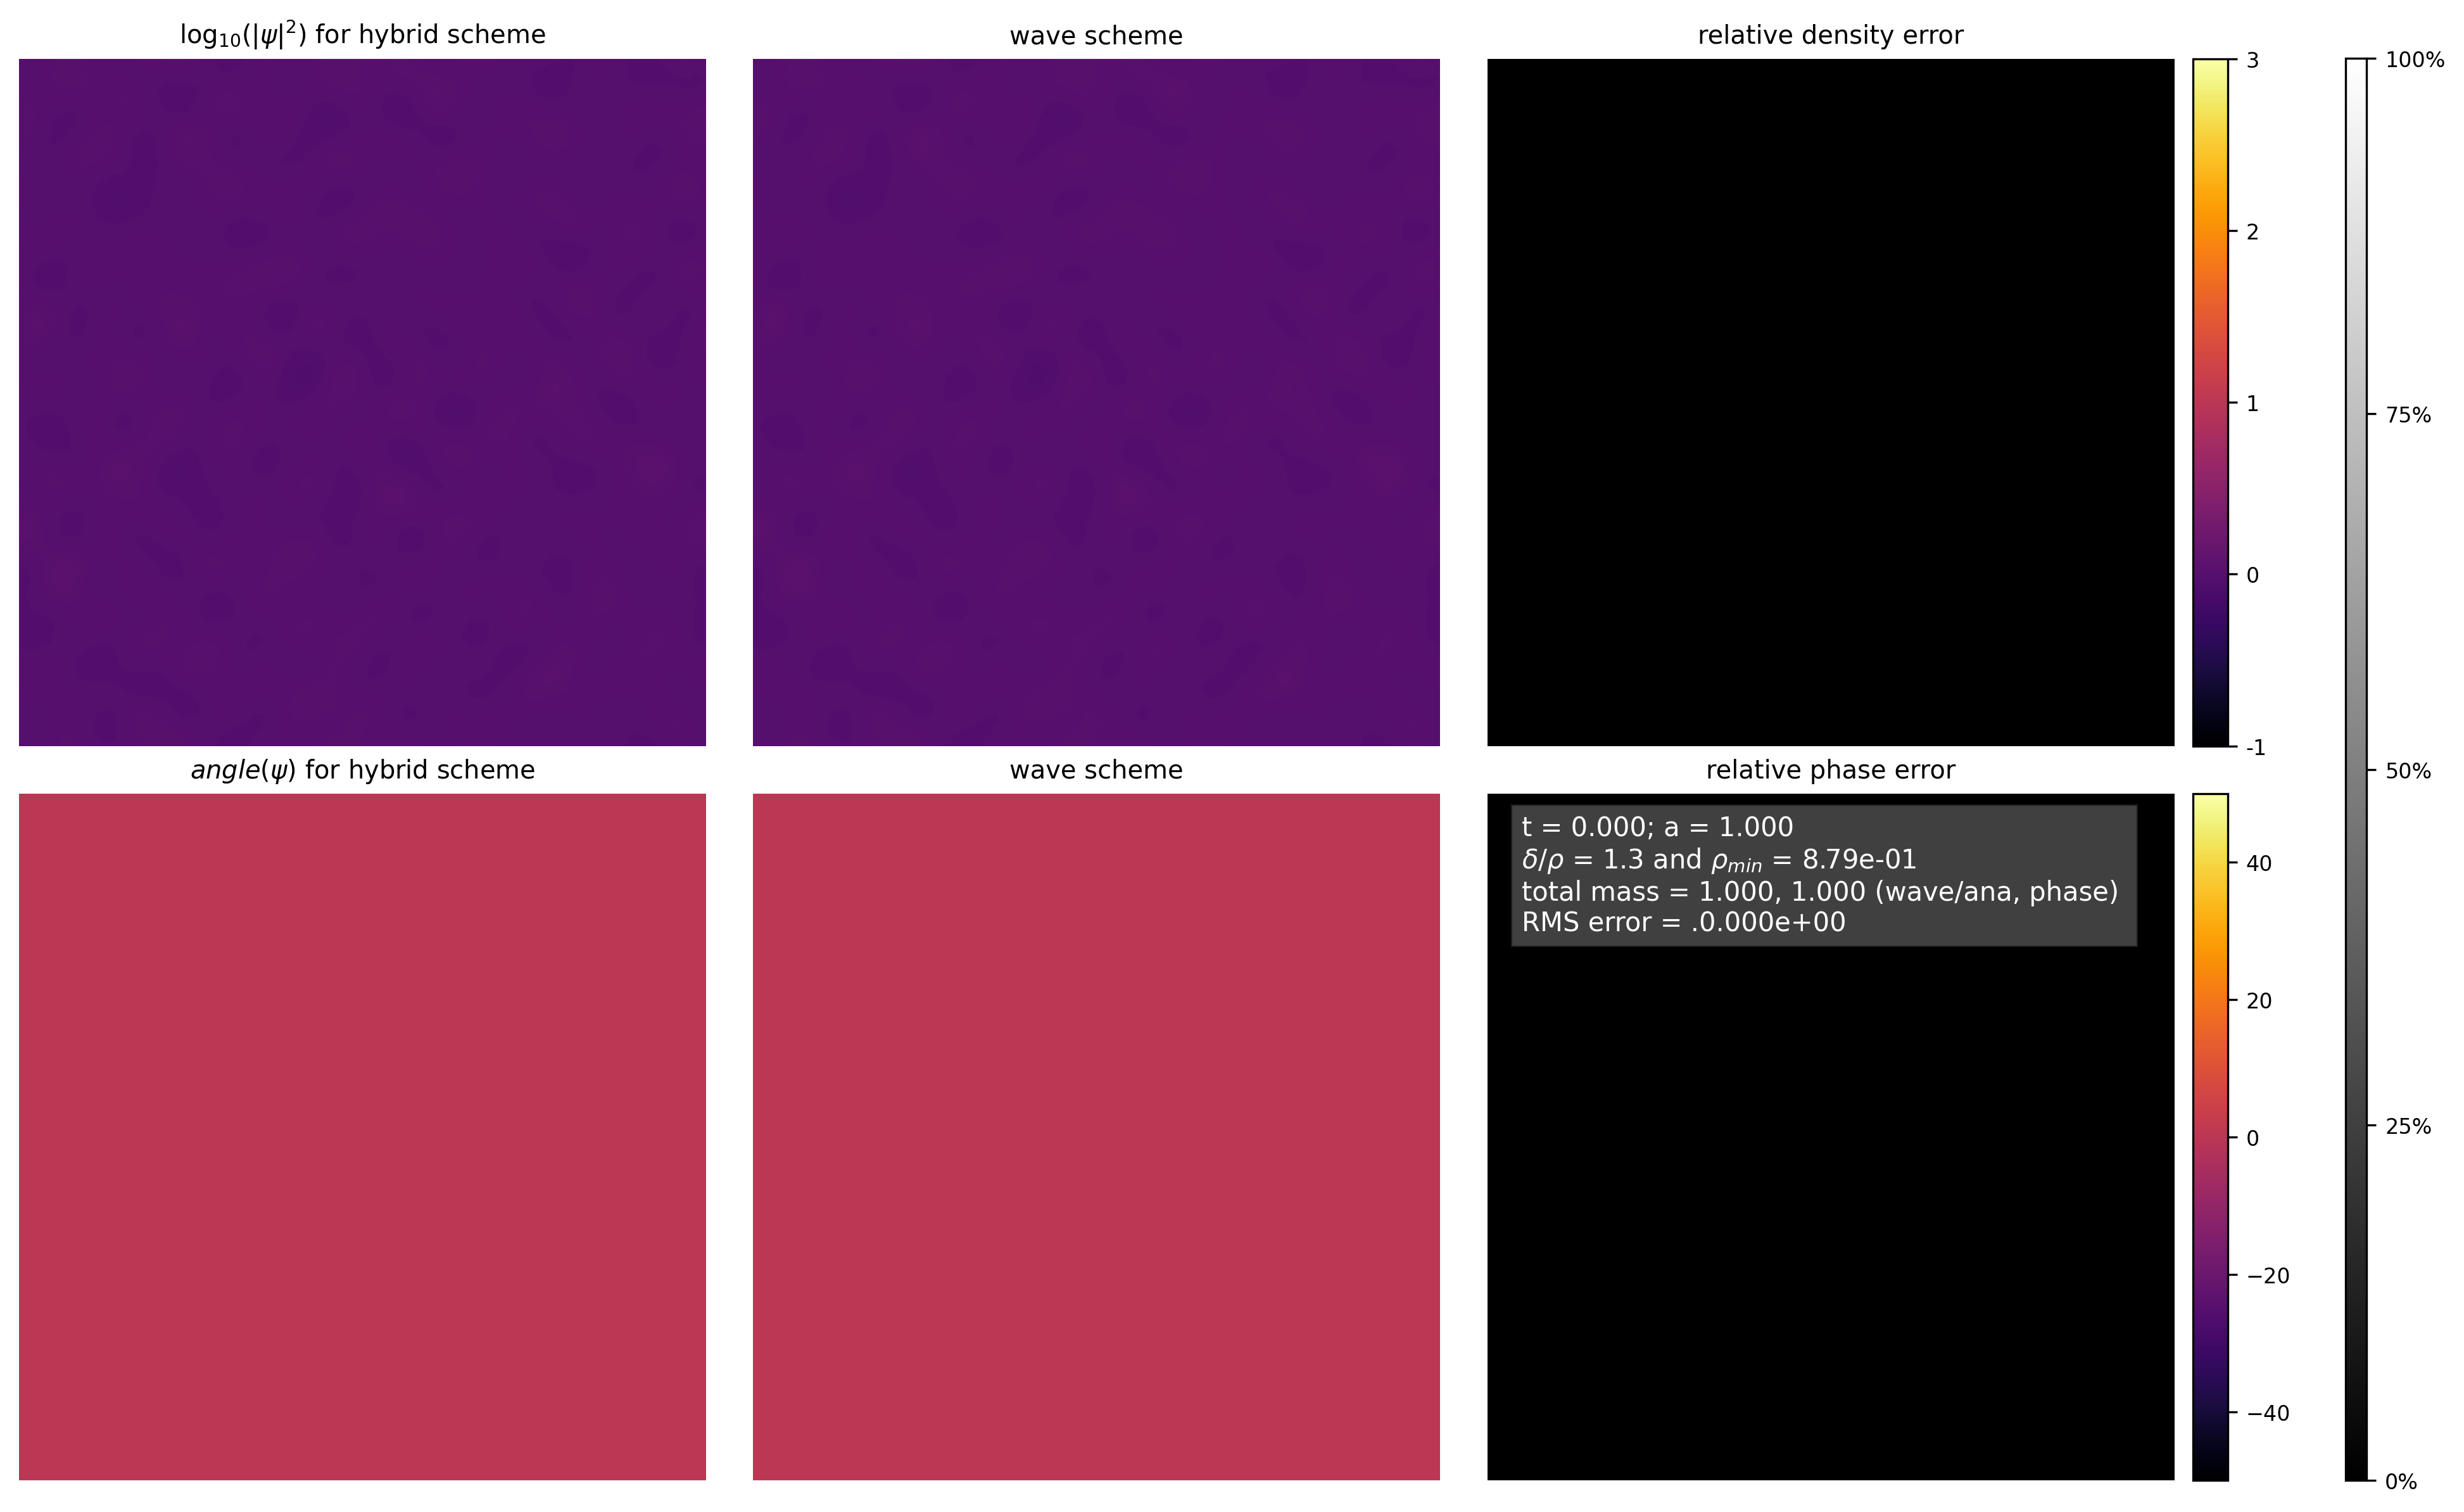

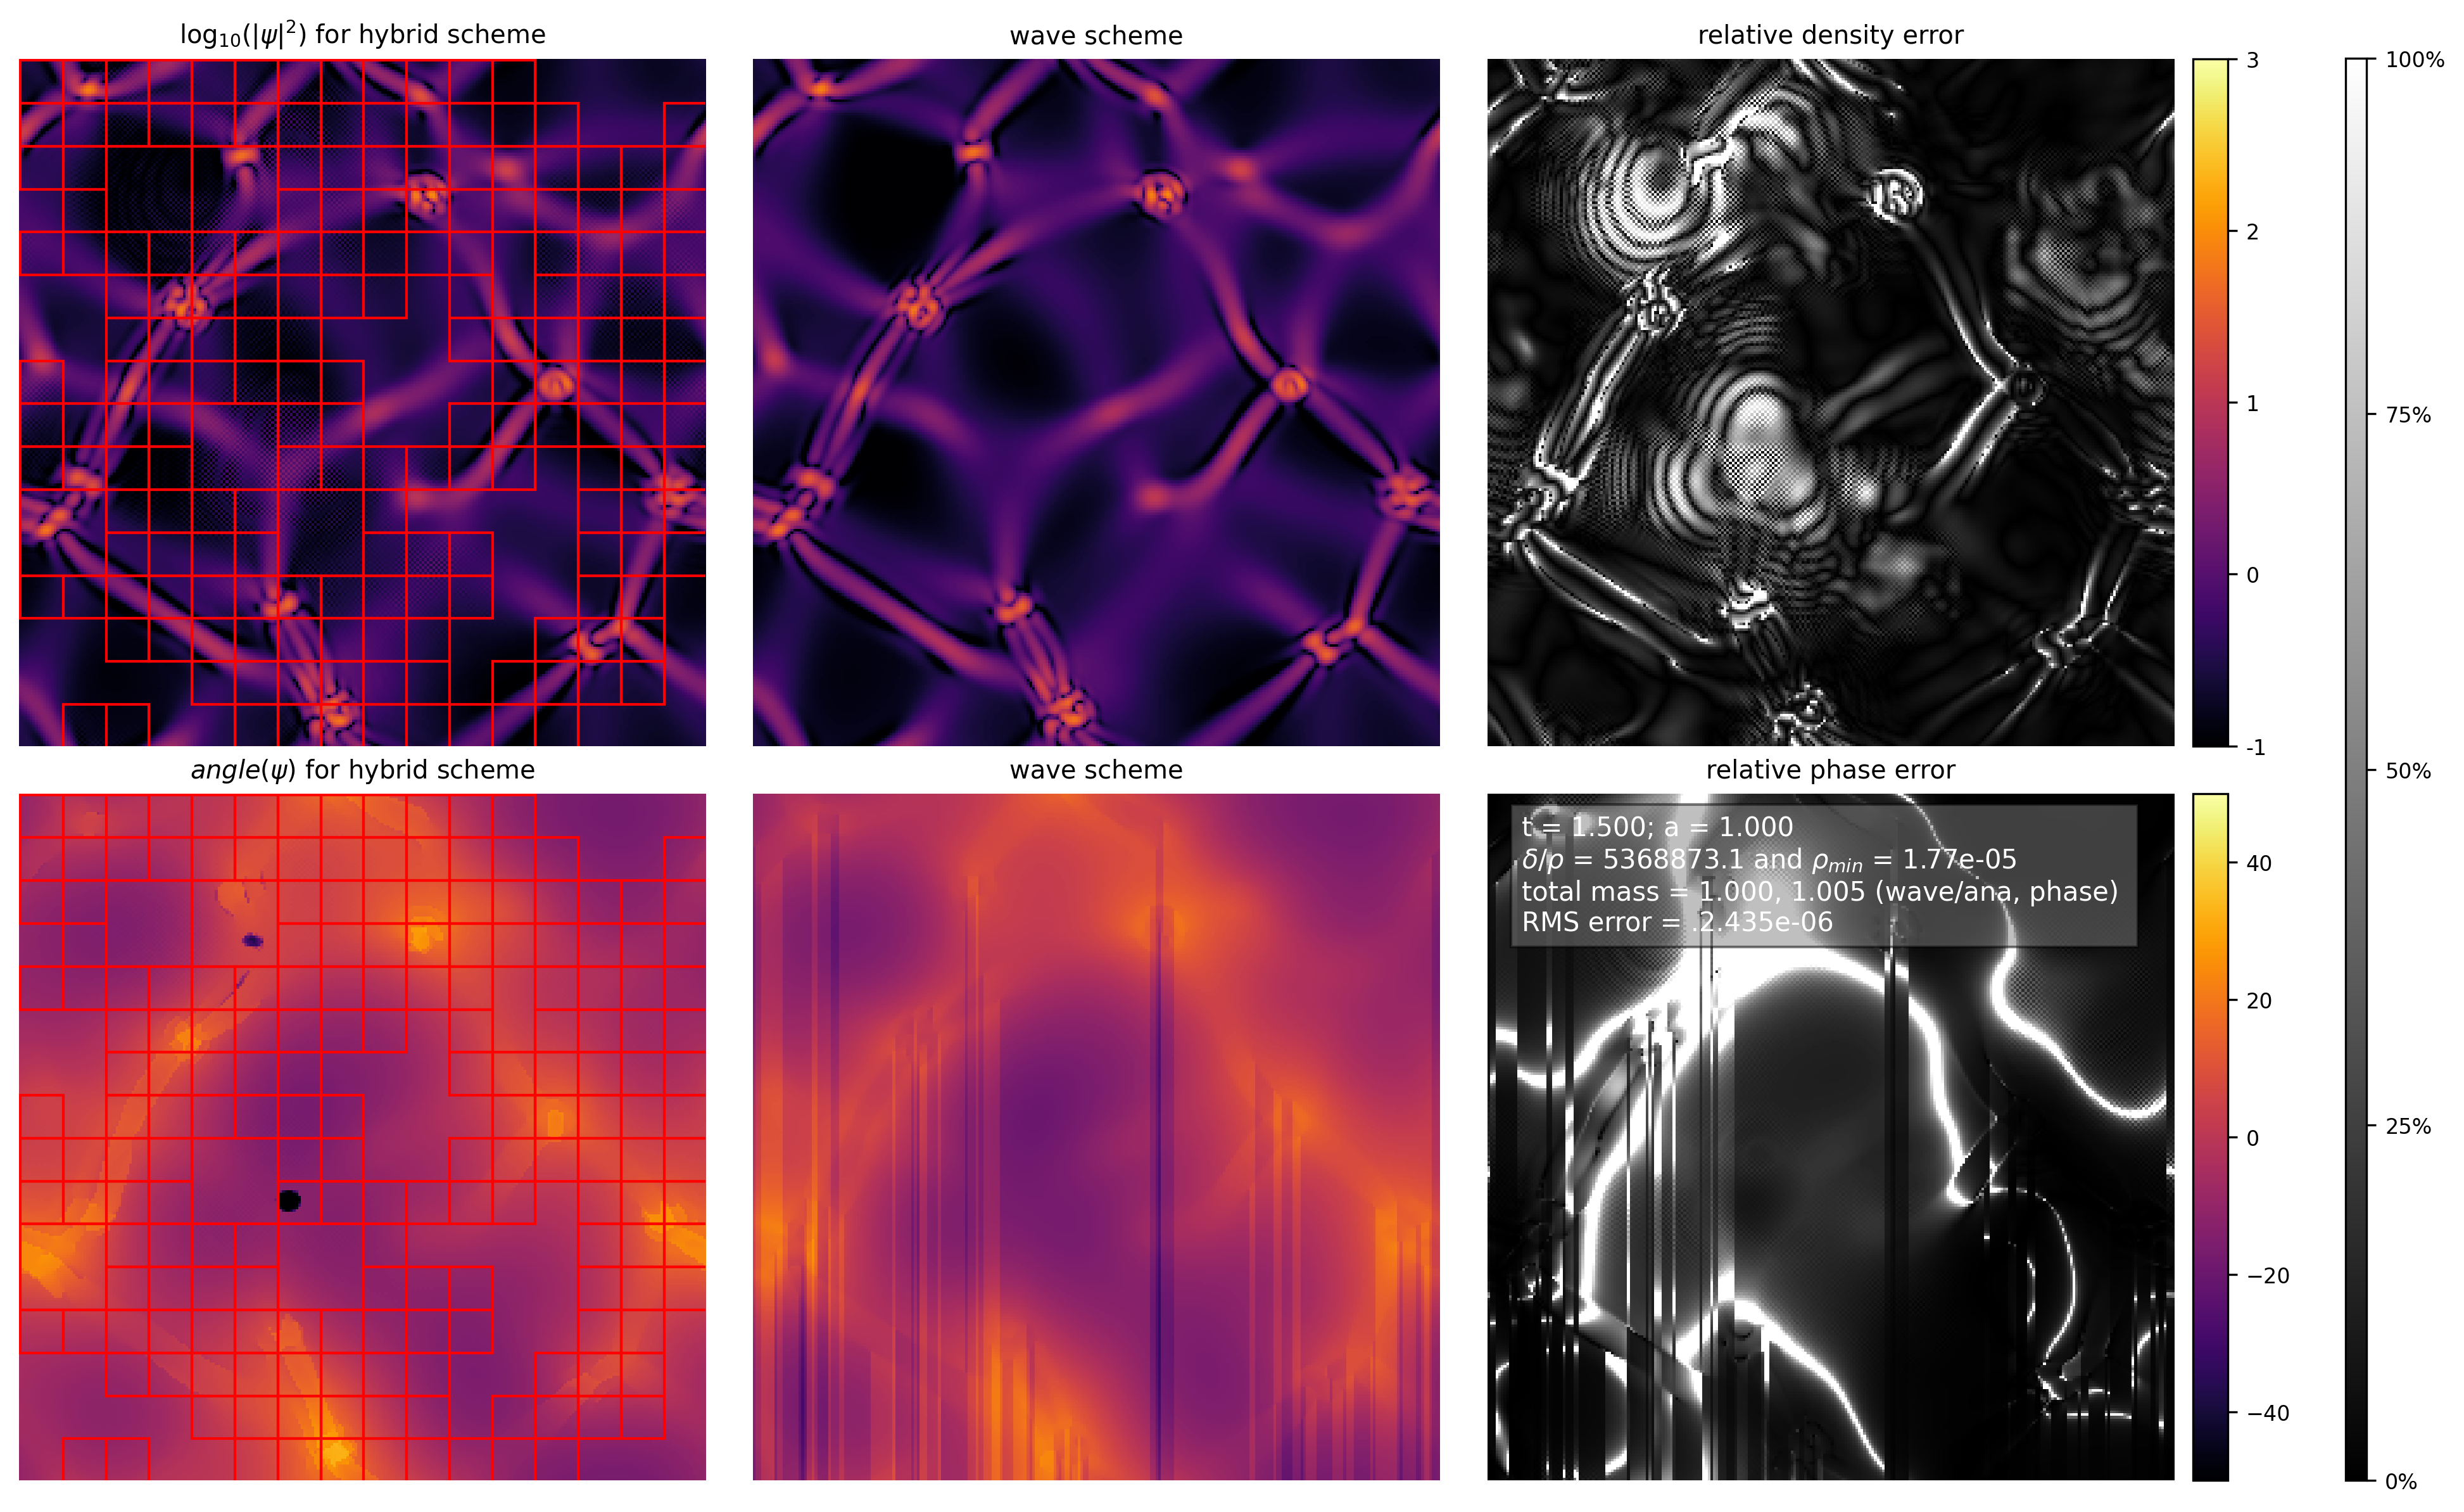

In [3]:
import src.hybrid_scheme as hybrid_scheme
import src.tests as tests
import src.config as config
import src.schemes as schemes
import src.wave_schemes as wave_schemes
import src.phase_schemes as phase_schemes
import src.tests as tests
import src.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from numba import njit

c = config.generateConfig(dt=1e-4, t0=0)

def resetConfig(c):
    c["dt"] = 1e-3
    c["domainSize"] = 25
    c["resolution"] = 256
    c["timeOrder"] = 2
    c["stencilOrder"] = 4
    c["dimension"] = 2
    c["plotPhaseMod2"] = True
    #c["phaseYlim"] = [-3.14, 3.14]
    c["densityYlim"] = [0, 1]
    c["subregions"] = [[0.3, 0.3, 0.1, 0.1], [0.3, 0.3, 0.4, 0.4]]
    c["debug"] = False
    c["slowDown"] = 5
    c["tEnd"] = 2
    c["gravity"] = 1
    c["useAdaptiveSubregions"] = True
    c["maxSpeedC"] = 64/10
    c["useSlopeLimiting"] = True 
    c["fps"] = 20
    c["outputTimestep"] = True
    c["useAdaptiveTimestep"] = True 
    c["plotPhaseMod2"] = False
    c["phaseYlim"] = [-50, 50]
    c["nThreads"] = 2
    c["useHybrid"] = True


resetConfig(c)

#def test(xx, dx, t):
#    return tests.cosmological1D(xx, dx, t, Lx=10, N=10, eps=5e-3)
def test(xx, yy, dx, t):
    return tests.cosmological2D(xx, yy, dx, t, Lx=25, Ly=25, N=10, eps=5e-3)
#@njit 
#def test(xx, yy, zz, dx, t):
#    return tests.cosmological3D(xx, yy, zz, dx, t, Lx=12, Ly=12, Lz=12, N=10, eps=5e-3)


#c, psi, density, phase = animation.loadRun("2d_runs/hybrid_scheme_72.npz")
#c["nthreads"] = 1
hs = hybrid_scheme.HybridScheme(c, test)
##
fs = wave_schemes.SpectralScheme(c, test)
#import fd
#hs.setDensity(density)
#hs.setPhase(fd.make_continuous(phase))
#fs.setPsi(psi)
#
#j = 0
#for i in range(1000):
#    dt = hs.getTimeStep()
#    print(f"t = {hs.t}, dt = {dt}")
#    hs.step(dt)
#    j += 1
#    if j % 100 == 0:
#        fig, ax = plt.subplots(dpi = 120)
#        ax.set_xlim([0, 128])
#        ax.set_ylim([0, 128])
#        ax.set_aspect("equal")
#        hs.binaryTree.plotTree(ax)
#        plt.show() 

#hs.run(1.4)
#fs.run(1.4)
#c["xlim"] = [0, 1]
#c["densityYlim"] = [0, 2]
#animation.createAnimation(hs, waveSolver=fs)
#plt.show()
animation.drawFrame(hs, waveSolver=fs)
fs.run(1.5)
hs.run(1.5)
animation.drawFrame(hs, waveSolver=fs)
##plt.show()

In [2]:
import cProfile
cProfile.run(
'hybrid_scheme.HybridScheme(c, test)')

Set up nD binary tree with N = 32
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
         4553 function calls (4514 primitive calls) in 4.938 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lin

In [7]:

def make_1d_continuous(f):
    for i in range(len(f) - 1):
        while (f[i] - f[i + 1]) > np.pi:
            f[i + 1 :] += 2 * np.pi
        while (f[i] - f[i + 1]) < -np.pi:
            f[i + 1 :] -= 2 * np.pi
    return f


def make_2d_boundary_continuous(f, boundaryThickness=7):
    if (f.shape[0] < boundaryThickness) or (f.shape[1] < boundaryThickness):
        raise ValueError("Boundary thicker than f itself")

    for i in range(boundaryThickness):
        make_1d_continuous(f[i, :])

    for i in range(f.shape[0] - boundaryThickness, f.shape[0]):
        make_1d_continuous(f[i, :])

    for i in range(boundaryThickness):
        make_1d_continuous(f[:, i])

    for i in range(f.shape[1] - boundaryThickness, f.shape[1]):
        make_1d_continuous(f[:, i])

    return f

def my_make_2d_boundary_continuous(f, boundaryThickness):
    Nx, Ny = np.array(f.shape) - 1
    bt = boundaryThickness
    
    #Continuity along faces (4 * faces)
    for i in range(bt):
        make_1d_continuous(f[ i, :])
    for i in range(bt):
        make_1d_continuous(f[ :, i])
    for i in range(bt):
        make_1d_continuous(f[-i, :])
    for i in range(bt):
        make_1d_continuous(f[ :,-i])

    return f


def my_make_3d_boundary_continuous(f, boundaryThickness):
    Nx, Ny, Nz = np.array(f.shape) - 1

    bt = boundaryThickness

    #Continuity along 6 faces
    for i in range(bt):
        make_2d_continuous(f[i ,  :,  :]) 
    for i in range(bt):
        make_2d_continuous(f[: ,  i,  :]) 
    for i in range(bt):
        make_2d_continuous(f[: ,  :,  i]) 
    for i in range(bt):
        make_2d_continuous(f[-i,  :,  :]) 
    for i in range(bt):
        make_2d_continuous(f[: , -i,  :]) 
    for i in range(bt):
        make_2d_continuous(f[: ,  :, -i]) 

    return f

In [8]:
phase2d = [phase for i in range(phase.shape[0])]
phase2d = np.stack(phase2d, axis=2)

In [9]:
phase2d.shape

(256, 256, 256)

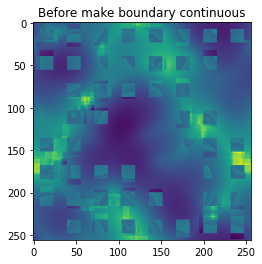

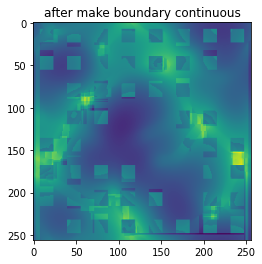

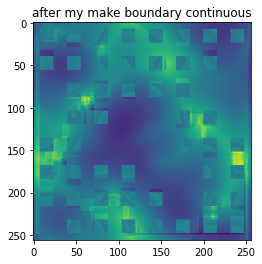

In [10]:
plt.title("Before make boundary continuous")
plt.imshow(phase)
plt.show()
after = make_2d_boundary_continuous(phase, 8)
plt.title("after make boundary continuous")
plt.imshow(phase)
plt.show()

after = my_make_2d_boundary_continuous(phase, 8)
plt.title("after my make boundary continuous")
plt.imshow(phase)
plt.show()

In [6]:

hs.run(1.5)
fs.run(1.5)

t = 1.0 dt = 0.0036109966303978437
t = 1.0036109966303979 dt = 0.0036024600215028377
t = 1.0072134566519007 dt = 0.0035834231841806734
t = 1.0107968798360814 dt = 0.0035662659733763508
t = 1.0143631458094577 dt = 0.0035508935186802986
t = 1.017914039328138 dt = 0.0035371588071972373
t = 1.0214511981353354 dt = 0.0035248279654248637
t = 1.0249760261007603 dt = 0.0035135733041312717
t = 1.0284895994048917 dt = 0.0034887880450848816
t = 1.0319783874499766 dt = 0.0034646338187113365
t = 1.035443021268688 dt = 0.0034423415209444965
t = 1.0388853627896326 dt = 0.003421816639236859
t = 1.0423071794288694 dt = 0.003402949230663926
t = 1.0457101286595334 dt = 0.0033889714210684914
t = 1.0490991000806018 dt = 0.00337949005103703
t = 1.052478590131639 dt = 0.0033635767271689787
t = 1.0558421668588078 dt = 0.003331217185272339
t = 1.0591733840440802 dt = 0.00330043481011871
t = 1.062473818854199 dt = 0.0032718962814221046
t = 1.065745715135621 dt = 0.003244451993050704
t = 1.068990167128672 dt = 0

In [7]:
pip install yt

     |████████████████████████████████| 40.1 MB 4.4 kB/s eta 0:00:01
     |████████████████████████████████| 98 kB 164 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


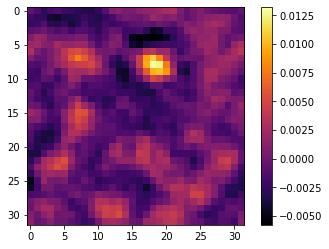

In [17]:
plt.imshow(np.log10(np.mean(fs.getDensity(),2)), cmap = 'inferno')
plt.colorbar()

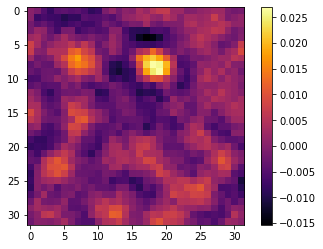

In [18]:
plt.imshow(np.log(np.mean(hs.getDensity(),2)), cmap = 'inferno')
plt.colorbar()

In [10]:
import yt
arr = fs.getDensity()
data = dict(Density=arr)
bbox = np.array([[-1.5, 1.5], [-1.5, 1.5], [1.5, 1.5]])
ds = yt.load_uniform_grid(data, arr.shape, 3.08e24, bbox=bbox, nprocs=12)

yt : [INFO     ] 2022-04-12 19:39:01,764 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-04-12 19:39:01,766 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2022-04-12 19:39:01,769 Parameters: domain_left_edge          = [-1.5 -1.5  1.5]
yt : [INFO     ] 2022-04-12 19:39:01,771 Parameters: domain_right_edge         = [1.5 1.5 1.5]
yt : [INFO     ] 2022-04-12 19:39:01,772 Parameters: cosmological_simulation   = 0


In [11]:
%matplotlib notebook
import yt
yt.toggle_interactivity()

Using matplotlib backend: nbAgg


In [13]:
slc = yt.SlicePlot(ds, "z", ("Density"))
slc.save()
slc = yt.SlicePlot(ds, "z", ("Density"))
slc.zoom(10)
slc.save("zoom")

yt : [INFO     ] 2022-04-12 19:40:50,313 xlim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:50,315 ylim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:50,317 xlim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:50,319 ylim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:50,323 Making a fixed resolution buffer of (('stream', 'Density')) 800 by 800
yt : [WARNING  ] 2022-04-12 19:40:50,366 Plotting ('stream', 'Density'): All values = 0.0 dimensionless
yt : [WARNING  ] 2022-04-12 19:40:50,367 Switching to linear colorbar scaling.
yt : [INFO     ] 2022-04-12 19:40:51,041 Saving plot UniformGridData_Slice_z_Density.png
yt : [INFO     ] 2022-04-12 19:40:51,591 xlim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:51,592 ylim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:51,594 xlim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:51,595 ylim = -1.500000 1.500000
yt : [INFO     ] 2022-04-12 19:40:51,599 Making a fixed resolution buffer of (('

['zoom_Slice_z_Density.png']

In [13]:

hs.run(1.3)
fs.run(1.3)

Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.PHASESOLVER
Create solver of type:  SolverType.WAVESOLVER
Create solver of type:  SolverType.NOSOLVER
Create solver of type:  SolverType.NOSOLVER
Create s

/media/xerox/INTENSO/hybrid_scheme/fd.py:235: RuntimeWarning: invalid value encountered in log
  logrho = np.log(rho)
Process ForkPoolWorker-7:
Process ForkPoolWorker-6:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/xerox/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Process ForkPoolWorker-5:
Traceback (most recent call last):
  File "/home/xerox/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/xerox/anaconda3/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()


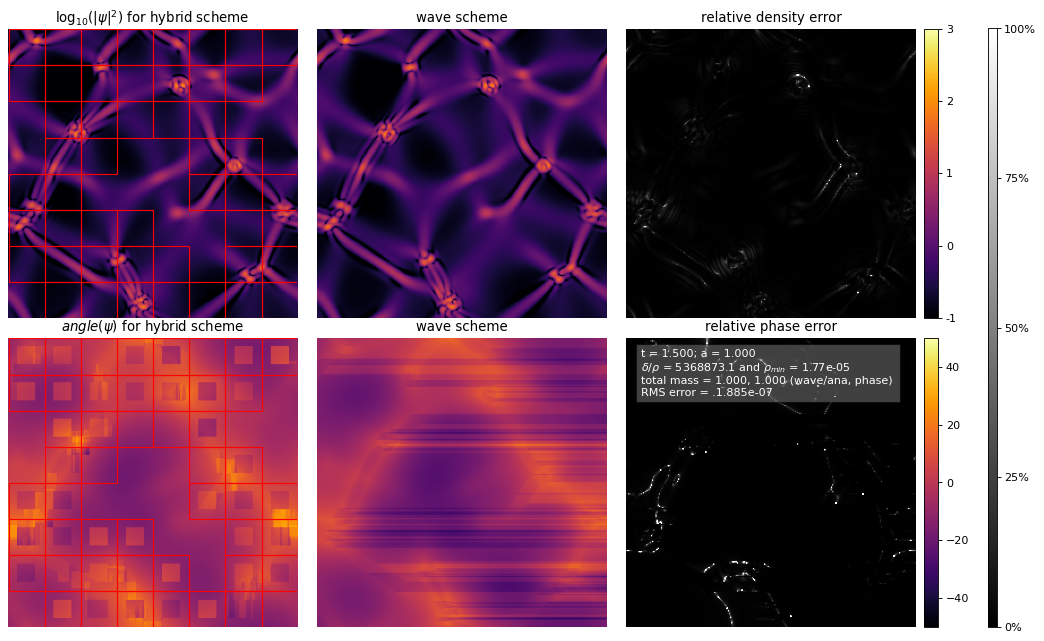

In [2]:
animation.drawFrame(hs, waveSolver=fs)

In [6]:
import fd 


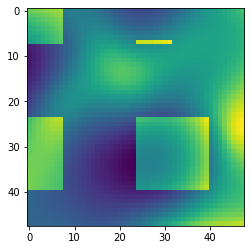

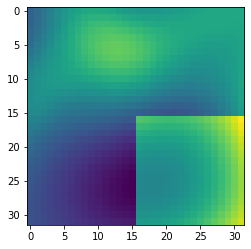

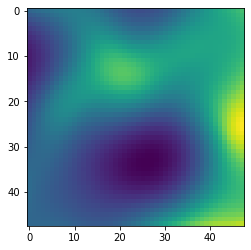

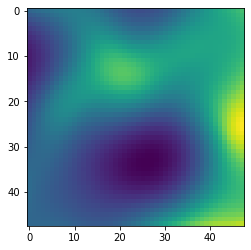

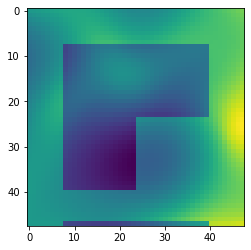

In [7]:
sub = hs.subregions[0]

phase = hs.fields[1].copy()
plt.imshow(phase[sub.outerFull])
plt.show()
plt.imshow(phase[sub.outerInner])
plt.show()
plt.imshow(fd.make_continuous(phase.copy()[sub.outerFull]))
plt.show()
plt.imshow(fd.old_make_2d_boundary_continuous(phase.copy()[sub.outerFull], 8))
plt.show()
plt.imshow(fd.make_boundary_continuous(phase.copy()[sub.outerFull], 8))
plt.show()

In [ ]:

def old_make_2d_boundary_continuous(f, boundaryThickness=7):
    if (f.shape[0] < boundaryThickness) or (f.shape[1] < boundaryThickness):
        raise ValueError("Boundary thicker than f itself")

    for i in range(boundaryThickness):
        make_1d_continuous(f[i, :])

    for i in range(f.shape[0] - boundaryThickness, f.shape[0]):
        make_1d_continuous(f[i, :])

    for i in range(f.shape[1]):
        make_1d_continuous(f[:, i])

    for i in range(f.shape[1] - boundaryThickness, f.shape[1]):
        make_1d_continuous(f[:, i])

    return f

In [29]:
def make_2d_boundary_continuous(f, boundaryThickness):
    Nx, Ny = np.array(f.shape) - 1
    print(Nx, Ny)
    bt = boundaryThickness

    
    for i in range(bt):
        fd.make_1d_continuous(f[Nx-i, :   ])

    plt.imshow(f)
    plt.show()

    for i in range(bt):
        fd.make_1d_continuous(f[:   , Ny-i])
    plt.imshow(f)
    plt.show()
    for i in range(bt):
        #Continuity along faces (4 * faces)
        fd.make_1d_continuous(f[i   , :   ])
    plt.imshow(f)
    plt.show()
    for i in range(bt):
        fd.make_1d_continuous(f[:   , i   ])
    plt.imshow(f)
    plt.show()

        #Continuity perpendicular to faces (4 * faces)
        #make_1d_continuous(f[i          , :bt])
        #make_1d_continuous(f[i          , Ny - bt: Ny])
        #make_1d_continuous(f[:bt        , i   ])
        #make_1d_continuous(f[Nx-bt:Nx   , i])

    return f

47 47


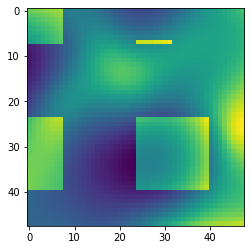

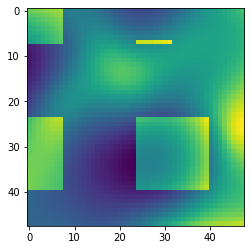

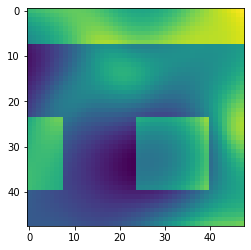

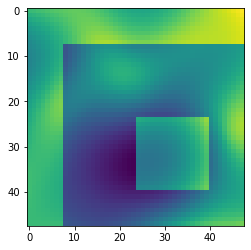

In [30]:

p2 = make_2d_boundary_continuous(phase.copy()[sub.outerFull], 8)

47 47


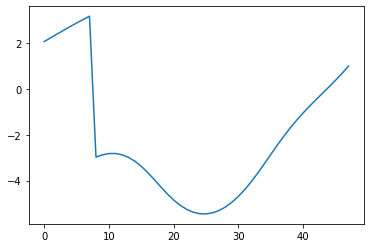

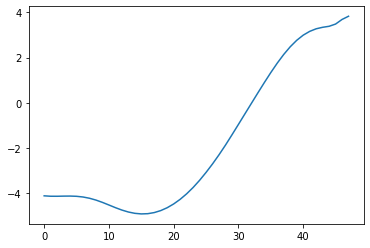

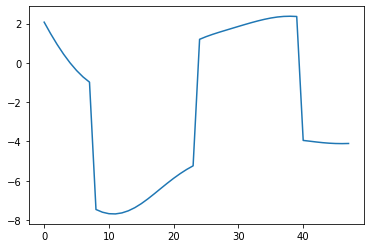

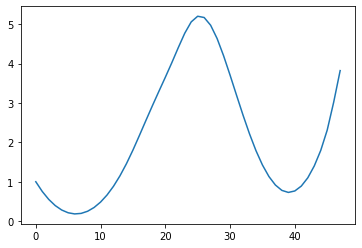

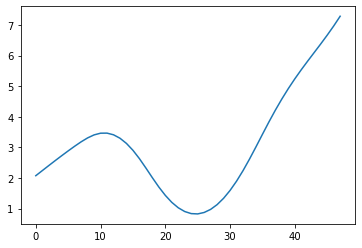

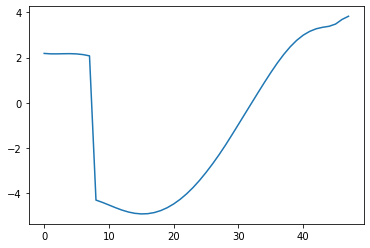

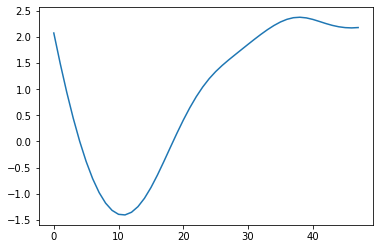

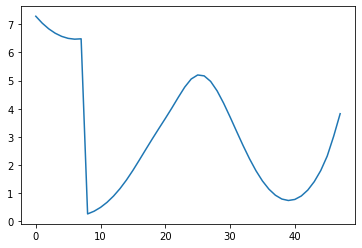

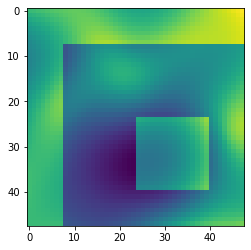

In [28]:
p1 = phase.copy()[sub.outerFull]
p2 = make_2d_boundary_continuous(phase.copy()[sub.outerFull], 8)
plt.plot(p1[0, :])
plt.show()
plt.plot(p1[-1, :])
plt.show()
plt.plot(p1[:, 0])
plt.show()
plt.plot(p1[:, -1])
plt.show()
plt.plot(p2[0, :])
plt.show()
plt.plot(p2[-1, :])
plt.show()
plt.plot(p2[:, 0])
plt.show()
plt.plot(p2[:, -1])
plt.show()
plt.imshow(p2)
plt.show()

In [21]:

plt.imshow()
plt.show()

TypeError: imshow() missing 1 required positional argument: 'X'

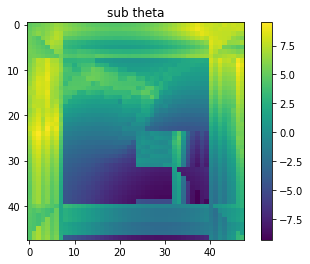

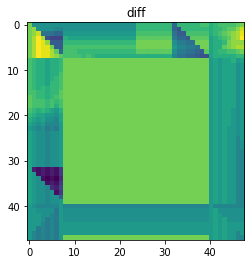

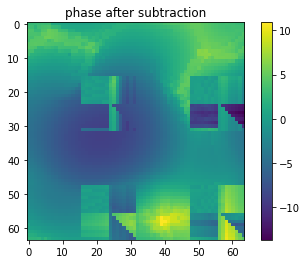

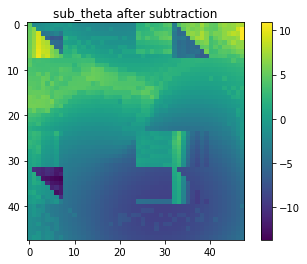

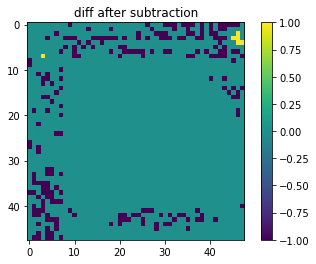

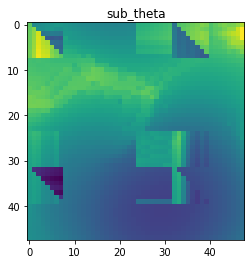

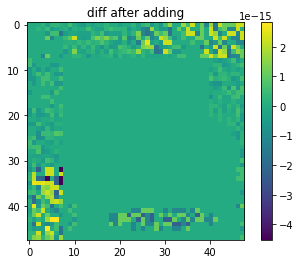

In [17]:
boundaryThickness = 8

# Difference above which 2 pi is added
max_diff = 5

sub_theta = make_2d_boundary_continuous(
    f=phase.copy()[sub.outerFull], boundaryThickness=boundaryThickness
)
plt.title("sub theta")
plt.imshow(sub_theta/(2*np.pi))
plt.colorbar()
plt.show()

#Check difference between old phase and updated phase at boundary
diff = (phase[sub.outerFull] - sub_theta)
diff[sub.boundaries[4]] = 0

plt.title("diff")
plt.imshow(diff)
plt.show()

#Subtract multiples of two pi s.t. difference is below two pi
sub_theta += 2*np.pi * np.sign(diff) * (np.abs(diff) // (2 * np.pi))


plt.title("phase after subtraction")
plt.imshow(phase/(2*np.pi))
plt.colorbar()
plt.show()

plt.title("sub_theta after subtraction")
plt.imshow(sub_theta/(2*np.pi))
plt.colorbar()
plt.show()

plt.title("diff after subtraction")

plt.imshow((phase[sub.outerFull] - sub_theta)/(2*np.pi))
plt.colorbar()
plt.show()

#If phase difference is still greater than max_diff, add 2*pi once with correct sign
c = np.abs(diff) % (2*np.pi) > max_diff 
sub_theta[c] += 2 * np.pi * np.sign(diff[c])


plt.title("sub_theta")
plt.imshow(sub_theta)
plt.show()


plt.title("diff after adding")

plt.imshow((phase[sub.outerFull] - sub_theta)/(2*np.pi))
plt.colorbar()
plt.show()

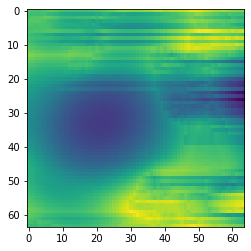

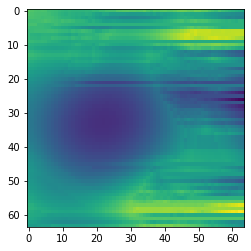

In [9]:
import fd 
plt.imshow(fd.make_continuous(hs.fields[1]))
plt.show()
plt.imshow(fd.make_continuous(fs.getPhase()))

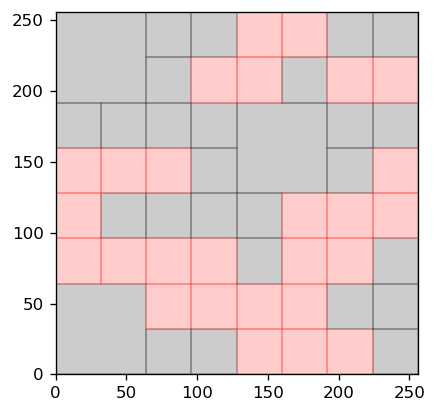

In [10]:

fig, ax = plt.subplots(dpi = 120)
ax.set_xlim([0, 256])
ax.set_ylim([0, 256])
ax.set_aspect("equal")
hs.binaryTree.plotTree(ax)
plt.show() 

In [11]:
x = np.arange(0, 5)
b = np.ix_(*[x for i in range(2)])

In [13]:
xlin = np.linspace(0, 1, 10)
xx, yy = np.meshgrid(xlin, xlin) 

f = np.array([xx, yy])

In [17]:
f[b,b]

/tmp/ipykernel_6936/2192701161.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  f[b,b]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

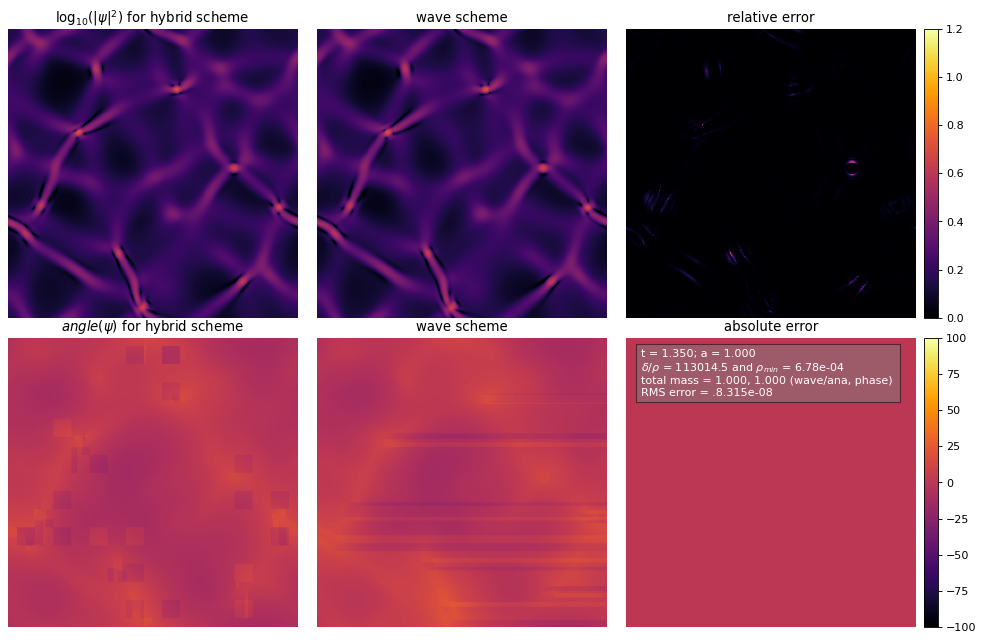

In [9]:
c["tEnd"] = hs.t
fsolver = wave_schemes.SpectralScheme(c, test)
fsolver.run()
animation.drawFrame(hs, waveSolver=fsolver)

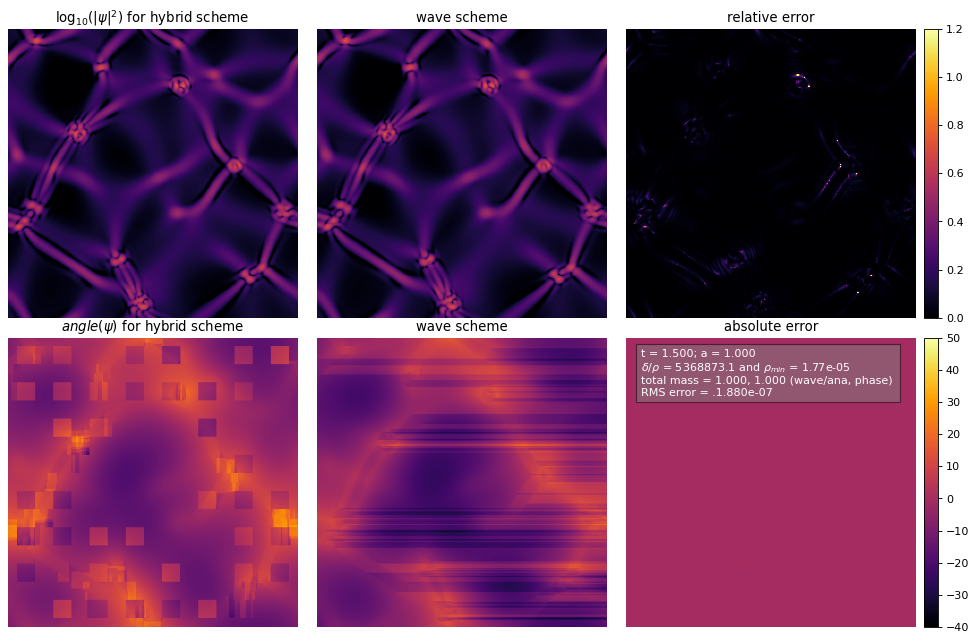

In [10]:
hs.config["phaseYlim"] = [-40, 50]
animation.drawFrame(hs, waveSolver=fsolver)

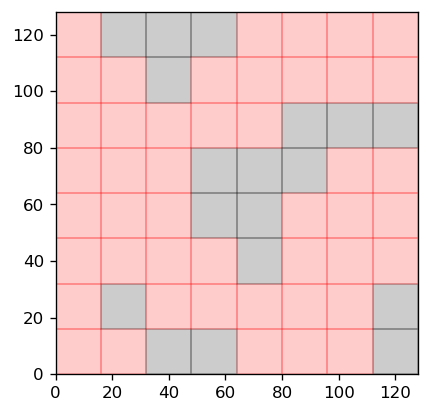

In [6]:
fig, ax = plt.subplots(dpi = 120)
ax.set_xlim([0, 128])
ax.set_ylim([0, 128])
ax.set_aspect("equal")
hs.binaryTree.plotTree(ax)

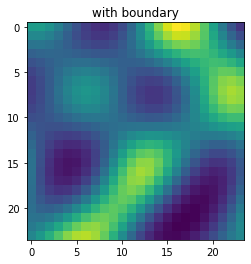

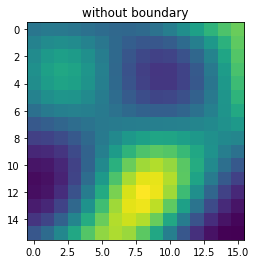

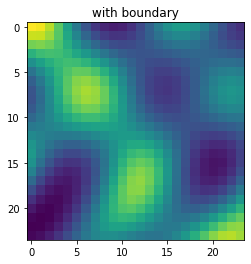

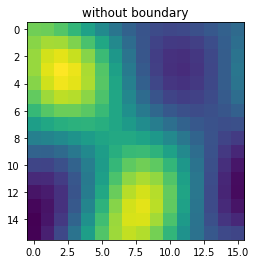

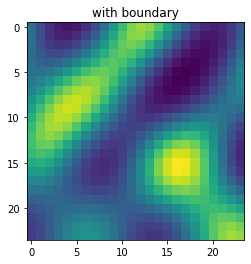

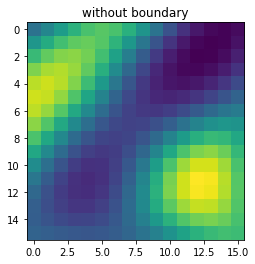

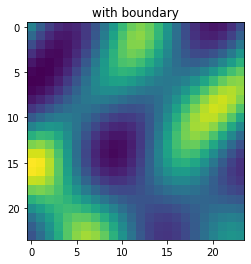

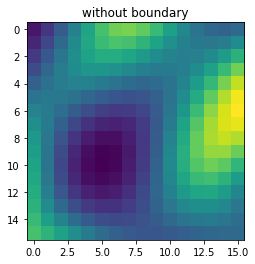

In [6]:
for sub in hs.subregions:
    plt.title("with boundary")
    plt.imshow(hs.fields[0][sub.outerFull])
    plt.show()
    plt.title("without boundary")
    plt.imshow(hs.fields[0][sub.outerInner])
    plt.show()
    #print(sub.outerFull, "\n", sub.outerInner, "\n",sub.boundary, "\n",sub.inner, "\n\n")

In [4]:
hs.getDensity()[hs.inner]

array([0.98427063, 1.00052584, 1.01415974, 1.02346078, 1.02746359,
       1.02614568, 1.02033437, 1.01159861, 1.0019492 , 0.99342988,
       0.98787086, 0.9865655 , 0.99006689, 0.99814899, 1.00975887,
       1.0231988 , 1.03634586, 1.04694939, 1.05299033, 1.05306544,
       1.04660876, 1.03407645, 1.01682881, 0.9969323 , 0.97681637,
       0.95892317, 0.94535897, 0.93763232, 0.93646878, 0.94179809,
       0.95270124, 0.96755551])

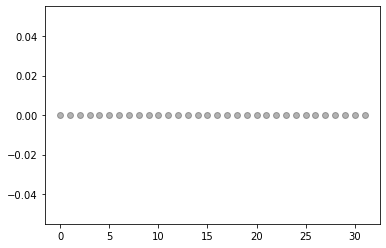

In [15]:
hs.binaryTree.plotTree(plt.gca())

In [2]:
resetConfig(c)
solver = phase_schemes.HOUpwindScheme(c, test)

wsolver = hybrid_scheme.WaveScheme(solver.dx, solver.eta, solver.dimension, solver.N_inner, solver.ghostBoundarySize, solver.f1_stencil, solver.f1_coeff, solver.b1_stencil, solver.b1_coeff, solver.c1_stencil, solver.c1_coeff, solver.c2_stencil, solver.c2_coeff)

In [ ]:
wsolver = hybrid_scheme.WaveScheme(solver.dx, solver.eta, solver.dimension, solver.N_inner, solver.ghostBoundarySize, solver.f1_stencil, solver.f1_coeff, solver.b1_stencil, solver.b1_coeff, solver.c1_stencil, solver.c1_coeff, solver.c2_stencil, solver.c2_coeff)

In [5]:
solver.fields[1] += 2*np.pi*10

In [6]:
for i in range(100):
    density, phase = wsolver.drift(*solver.fields, 1e-4)
    print(density, phase)
    solver.fields[0] = density 
    solver.fields[1] = phase 
    solver.t += 1e-4

[1.0331444  1.0345845  1.03300071 1.02875009 1.02251082 1.01517087
 1.00768954 1.00095566 0.99566447 0.99222956 0.99073964 0.9909635
 0.99240137 0.99437556 0.99614852 0.99705141 0.99660314 0.99459931
 0.99115498 0.98669301 0.98188015 0.97752278 0.97444053 0.97333835
 0.97469545 0.97868541 0.9851369  0.9935402  1.00310019 1.01283201
 1.02168918 1.02870778] [62.83177791 62.83177745 62.83178621 62.8318028  62.83182478 62.83184895
 62.83187181 62.83189009 62.83190125 62.83190386 62.83189793 62.83188481
 62.83186699 62.83184769 62.83183028 62.83181778 62.83181241 62.83181523
 62.83182605 62.83184337 62.83186462 62.83188652 62.83190552 62.83191842
 62.83192288 62.83191783 62.83190366 62.8318822  62.83185636 62.83182967
 62.83180574 62.83178772]
[1.0331429  1.03458302 1.03299946 1.02874925 1.02251049 1.01517111
 1.00769028 1.00095678 0.99566579 0.99223088 0.99074075 0.99096423
 0.9924016  0.99437527 0.99614776 0.99705031 0.99660187 0.99459808
 0.99115399 0.98669242 0.98188007 0.97752323 0.974

In [36]:
wsolver.inner

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),)

In [5]:
for sub, inner, full in hs.subregions:
    print(inner[0])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


AttributeError: 'tuple' object has no attribute 'flatten'

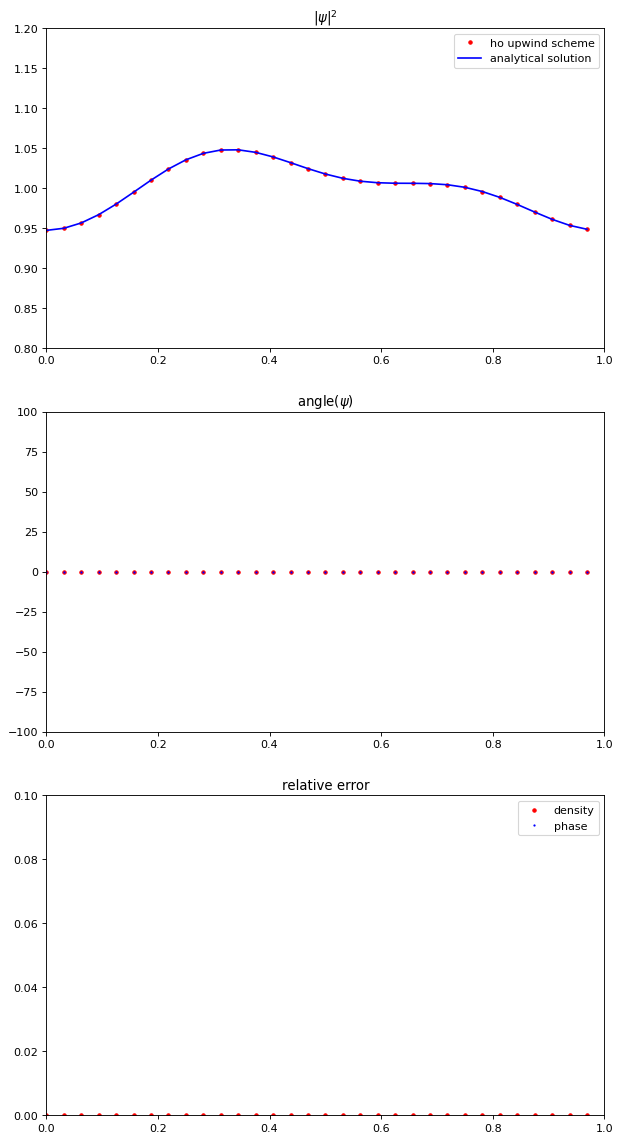

In [8]:
c["xlim"] = [0, 1]
c["densityYlim"] = [0.8, 1.2]
animation.drawFrame(hs, "ho upwind scheme", c, test, "lwu")